In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
trues_informer = np.load("informerOutput/true.npy")
preds_informer = np.load("informerOutput/pred.npy")
mean_informer = np.load("informerOutput/mean.npy")
std_informer = np.load("informerOutput/std.npy")

trues_autoformer = np.load("autoformerOutput/true.npy")
preds_autoformer = np.load("autoformerOutput/pred.npy")
mean_autoformer = np.load("autoformerOutput/mean.npy")
std_autoformer = np.load("autoformerOutput/std.npy")

In [43]:
class StandardScaler():
    def __init__(self):
        self.mean = mean_informer[-1]
        self.std = mean_informer[-1]

    def inverse_transform(self, data):
        return (data * self.std) + self.mean
scaler = StandardScaler()

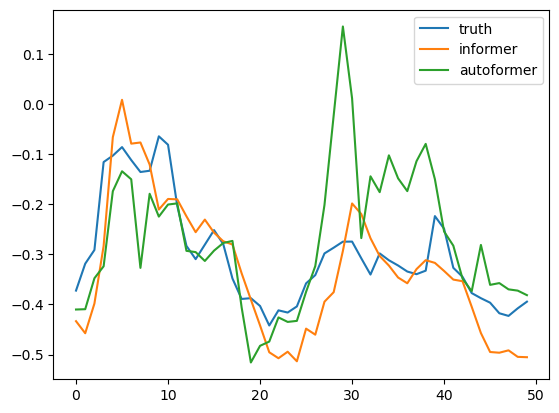

In [53]:
plt.figure()
plt.plot(trues_informer[0:50,0,-1], label='truth')
plt.plot(preds_informer[0:50,0,-1], label='informer')
plt.plot(preds_autoformer[0:50,0,-1], label='autoformer')
plt.legend()
plt.show()

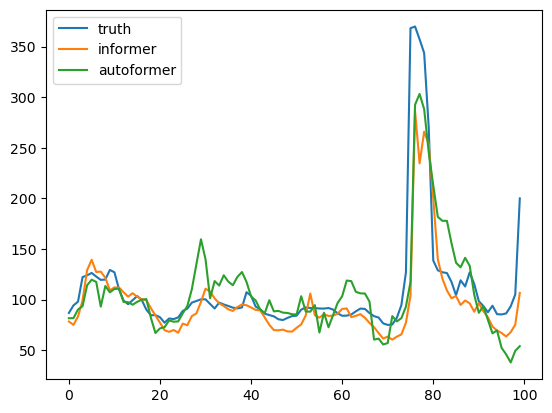

In [55]:
scaler = StandardScaler()
plt.figure()
plt.plot(scaler.inverse_transform(trues_informer[0:100,0,-1]), label='truth')
plt.plot(scaler.inverse_transform(preds_informer[0:100,0,-1]), label='informer')
plt.plot(scaler.inverse_transform(preds_autoformer[0:100,0,-1]), label='autoformer')
plt.legend()
plt.show()

In [56]:
import numpy as np
def RSE(pred, true):
    return np.sqrt(np.sum((true - pred) ** 2)) / np.sqrt(np.sum((true - true.mean()) ** 2))
def CORR(pred, true):
    u = ((true - true.mean(0)) * (pred - pred.mean(0))).sum(0)
    d = np.sqrt(((true - true.mean(0)) ** 2 * (pred - pred.mean(0)) ** 2).sum(0))
    return (u / d).mean(-1)
def MAE(pred, true):
    return np.mean(np.abs(pred - true))
def MSE(pred, true):
    return np.mean((pred - true) ** 2)
def RMSE(pred, true):
    return np.sqrt(MSE(pred, true))
def MAPE(pred, true):
    return np.mean(np.abs((pred - true) / true))
def MSPE(pred, true):
    return np.mean(np.square((pred - true) / true))
def metric(pred, true):
    mae = MAE(pred, true)
    rmse = RMSE(pred, true)
    return mae, rmse


In [59]:
metric(trues_informer[0:100,0,-1], preds_informer[0:100,0,-1])

(0.12598628, 0.25893557)

In [61]:
metric(trues_informer[0:100,0,-1], preds_autoformer[0:100,0,-1])

(0.15987962, 0.27795607)